# Attenuation of a WR-22 Waveguide Filled with HDPE/Alumina

In [1]:
import skrf as rf
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt 

# https://github.com/garrettj403/Waveguide
from waveguide import conductor_loss, dielectric_loss, np2db, cutoff_frequency

# https://github.com/garrettj403/SciencePlots
plt.style.use(["science", "notebook"])

In [2]:
# Material properties: HDPE
er_mag1 = 2.3
tand1 = 2e-4
er1 = er_mag1 * (1 - 1j * tand1)

In [3]:
# Material properties: alumina
er_mag2 = 9.9
tand2 = 10e-4
er2 = er_mag2 * (1 - 1j * tand2)

In [4]:
# Waveguide conductivity
cond1 = 4e7
cond2 = 12e7

In [5]:
# Waveguide dimensions: WR-22.4
a = 224 * sc.mil
b = 112 * sc.mil

In [6]:
# Frequency sweep
freq1 = np.linspace(cutoff_frequency(a, b, er_mag1)*1.25, 43.5e9, 81)
freq2 = np.linspace(cutoff_frequency(a, b, er_mag2)*1.25, 43.5e9, 101)

# Sweep: conductivity

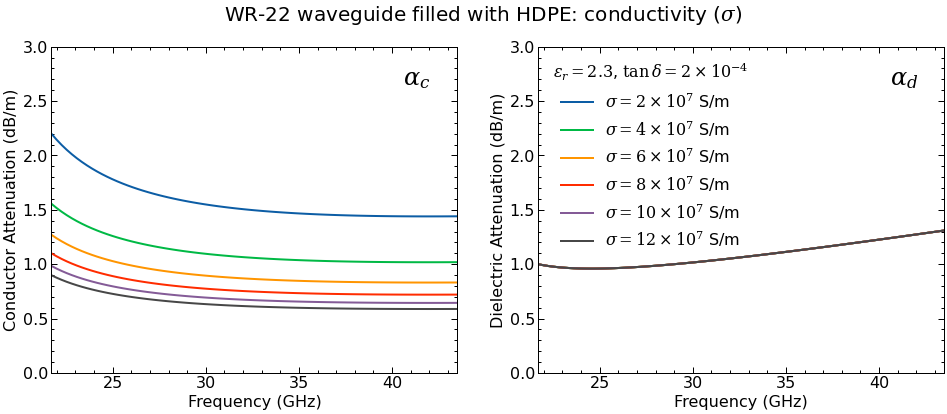

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle(r"WR-22 waveguide filled with HDPE: conductivity ($\sigma$)", fontsize=20)
ax1.text(0.9, 0.9, r'$\alpha_c$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.9, 0.9, r'$\alpha_d$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
for _cond in np.array([2, 4, 6, 8, 10, 12]) * 1e7:
    alphac = conductor_loss(freq1, _cond, a, b, er=er1, ur=1)
    alphad = dielectric_loss(freq1, a, b, er=er1, ur=1)
    ax1.plot(freq1/1e9, np2db(alphac), label=r"$\sigma={:.0f}\times10^7$ S/m".format(_cond/1e7))
    ax2.plot(freq1/1e9, np2db(alphad), label=r"$\sigma={:.0f}\times10^7$ S/m".format(_cond/1e7))
ax1.autoscale(enable=True, axis='x', tight=True)
ax2.autoscale(enable=True, axis='x', tight=True)
ax1.set_ylabel("Conductor Attenuation (dB/m)")
ax2.set_ylabel("Dielectric Attenuation (dB/m)")
ax1.set_xlabel("Frequency (GHz)")
ax2.set_xlabel("Frequency (GHz)")
ax2.legend(loc=2, title=r"$\varepsilon_r={:.1f}$, $\tan\,\delta={:.0f}\times10^{{-4}}$".format(er_mag1, tand1*1e4))
ax1.set_ylim([0, 3])
ax2.set_ylim([0, 3])
fig.savefig("results/wr22-hdpe-cond.png", dpi=400);

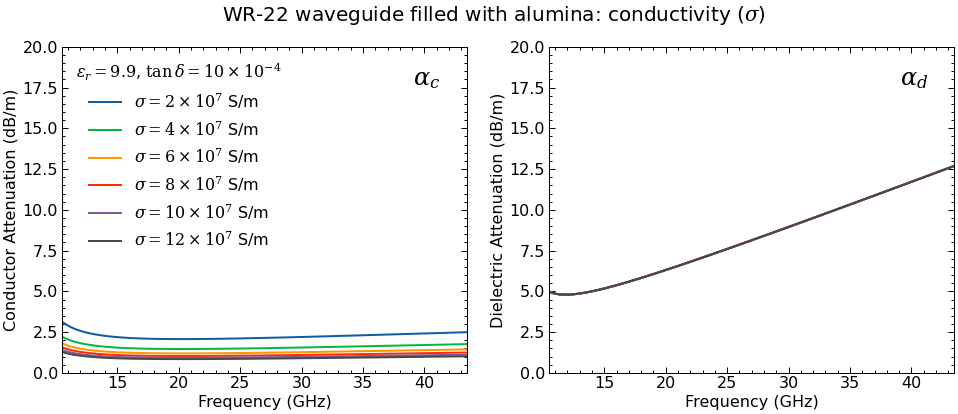

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle(r"WR-22 waveguide filled with alumina: conductivity ($\sigma$)", fontsize=20)
ax1.text(0.9, 0.9, r'$\alpha_c$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.9, 0.9, r'$\alpha_d$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
for _cond in np.array([2, 4, 6, 8, 10, 12]) * 1e7:
    alphac = conductor_loss(freq2, _cond, a, b, er=er2)
    alphad = dielectric_loss(freq2, a, b, er=er2)
    ax1.plot(freq2/1e9, np2db(alphac), label=r"$\sigma={:.0f}\times10^7$ S/m".format(_cond/1e7))
    ax2.plot(freq2/1e9, np2db(alphad), label=r"$\sigma={:.0f}\times10^7$ S/m".format(_cond/1e7))
ax1.autoscale(enable=True, axis='x', tight=True)
ax2.autoscale(enable=True, axis='x', tight=True)
ax1.set_ylabel("Conductor Attenuation (dB/m)")
ax2.set_ylabel("Dielectric Attenuation (dB/m)")
ax1.set_xlabel("Frequency (GHz)")
ax2.set_xlabel("Frequency (GHz)")
ax1.legend(loc=2, title=r"$\varepsilon_r={:.1f}$, $\tan\,\delta={:.0f}\times10^{{-4}}$".format(er_mag2, tand2*1e4))
ax1.set_ylim([0, 20])
ax2.set_ylim([0, 20])
fig.savefig("results/wr22-alumina-cond.png", dpi=400);

# Sweep: relative permittivity

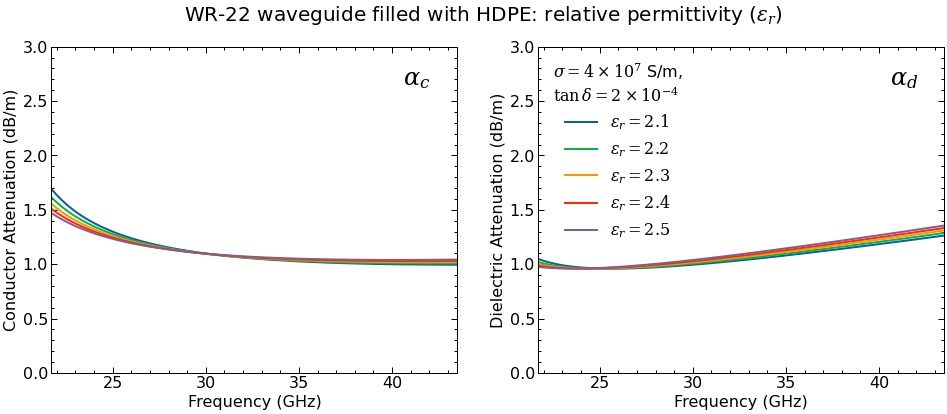

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle(r"WR-22 waveguide filled with HDPE: relative permittivity ($\varepsilon_r$)", fontsize=20)
ax1.text(0.9, 0.9, r'$\alpha_c$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.9, 0.9, r'$\alpha_d$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
for _er_mag in np.array([2.1, 2.2, 2.3, 2.4, 2.5]):
    _er = _er_mag * (1 - 1j * tand1)
    alphac = conductor_loss(freq1, cond1, a, b, er=_er, ur=1)
    alphad = dielectric_loss(freq1, a, b, er=_er, ur=1)
    ax1.plot(freq1/1e9, np2db(alphac), label=r"$\varepsilon_r={:.1f}$".format(_er_mag))
    ax2.plot(freq1/1e9, np2db(alphad), label=r"$\varepsilon_r={:.1f}$".format(_er_mag))
ax1.autoscale(enable=True, axis='x', tight=True)
ax2.autoscale(enable=True, axis='x', tight=True)
ax1.set_ylabel("Conductor Attenuation (dB/m)")
ax2.set_ylabel("Dielectric Attenuation (dB/m)")
ax1.set_xlabel("Frequency (GHz)")
ax2.set_xlabel("Frequency (GHz)")
line1 = r"$\sigma={:.0f}\times10^7$ S/m".format(cond1/1e7)
line2 = r"$\tan\,\delta={:.0f}\times10^{{-4}}$".format(tand1*1e4)
ax2.legend(loc=2, title="{},\n{}".format(line1, line2))
ax1.set_ylim([0, 3])
ax2.set_ylim([0, 3])
fig.savefig("results/wr22-hdpe-er.png", dpi=400);

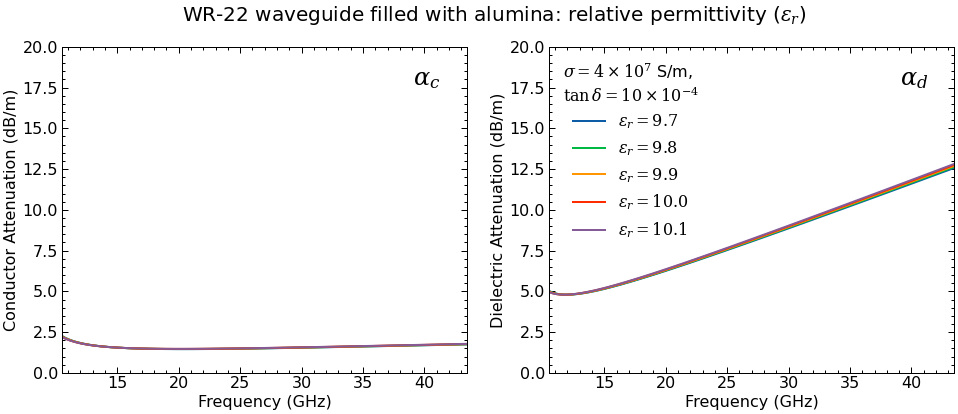

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle(r"WR-22 waveguide filled with alumina: relative permittivity ($\varepsilon_r$)", fontsize=20)
ax1.text(0.9, 0.9, r'$\alpha_c$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.9, 0.9, r'$\alpha_d$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
for _er_mag in np.array([9.7, 9.8, 9.9, 10.0, 10.1]):
    _er = _er_mag * (1 - 1j * tand2)
    alphac = conductor_loss(freq2, cond1, a, b, er=_er, ur=1)
    alphad = dielectric_loss(freq2, a, b, er=_er, ur=1)
    ax1.plot(freq2/1e9, np2db(alphac), label=r"$\varepsilon_r={:.1f}$".format(_er_mag))
    ax2.plot(freq2/1e9, np2db(alphad), label=r"$\varepsilon_r={:.1f}$".format(_er_mag))
ax1.autoscale(enable=True, axis='x', tight=True)
ax2.autoscale(enable=True, axis='x', tight=True)
ax1.set_ylabel("Conductor Attenuation (dB/m)")
ax2.set_ylabel("Dielectric Attenuation (dB/m)")
ax1.set_xlabel("Frequency (GHz)")
ax2.set_xlabel("Frequency (GHz)")
line1 = r"$\sigma={:.0f}\times10^7$ S/m".format(cond1/1e7)
line2 = r"$\tan\,\delta={:.0f}\times10^{{-4}}$".format(tand2*1e4)
ax2.legend(loc=2, title="{},\n{}".format(line1, line2))
ax1.set_ylim([0, 20])
ax2.set_ylim([0, 20])
fig.savefig("results/wr22-alumina-er.png", dpi=400);

# Sweep: loss tangent

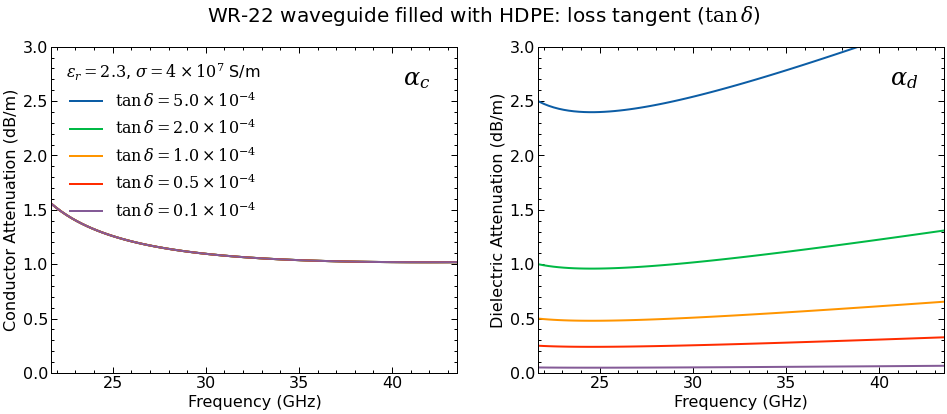

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle(r"WR-22 waveguide filled with HDPE: loss tangent ($\tan\,\delta$)", fontsize=20)
ax1.text(0.9, 0.9, r'$\alpha_c$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.9, 0.9, r'$\alpha_d$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
for _tand in np.array([1, 5, 10, 20, 50][::-1]) * 1e-5:
    _er = er_mag1 * (1 - 1j * _tand)
    alphac = conductor_loss(freq1, cond1, a, b, er=_er, ur=1)
    alphad = dielectric_loss(freq1, a, b, er=_er, ur=1)
    ax1.plot(freq1/1e9, np2db(alphac), label=r"$\tan\,\delta={:.1f}\times10^{{-4}}$".format(_tand*1e4))
    ax2.plot(freq1/1e9, np2db(alphad), label=r"$\tan\,\delta={:.1f}\times10^{{-4}}$".format(_tand*1e4))
ax1.autoscale(enable=True, axis='x', tight=True)
ax2.autoscale(enable=True, axis='x', tight=True)
ax1.set_ylabel("Conductor Attenuation (dB/m)")
ax2.set_ylabel("Dielectric Attenuation (dB/m)")
ax1.set_xlabel("Frequency (GHz)")
ax2.set_xlabel("Frequency (GHz)")
ax1.legend(loc=2, title=r"$\varepsilon_r={:.1f}$, $\sigma={:.0f}\times10^7$ S/m".format(er_mag1, cond1/1e7))
ax1.set_ylim([0, 3])
ax2.set_ylim([0, 3])
fig.savefig("results/wr22-hdpe-tand-300k.png", dpi=400);

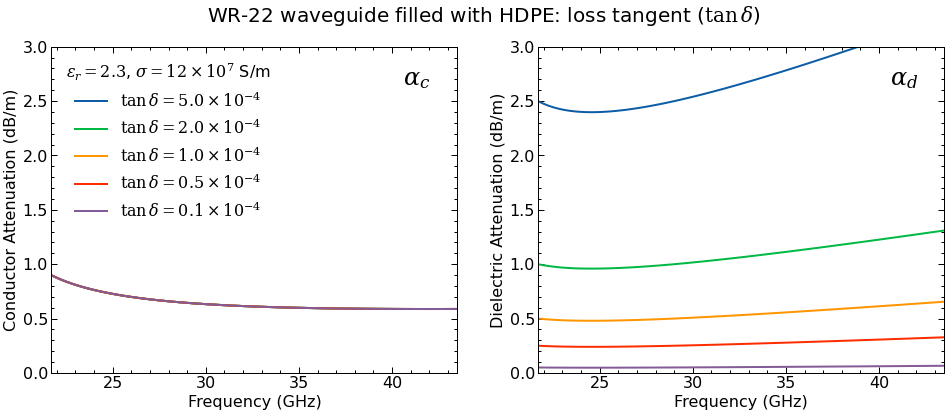

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle(r"WR-22 waveguide filled with HDPE: loss tangent ($\tan\,\delta$)", fontsize=20)
ax1.text(0.9, 0.9, r'$\alpha_c$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.9, 0.9, r'$\alpha_d$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
for _tand in np.array([1, 5, 10, 20, 50][::-1]) * 1e-5:
    _er = er_mag1 * (1 - 1j * _tand)
    alphac = conductor_loss(freq1, cond2, a, b, er=_er, ur=1)
    alphad = dielectric_loss(freq1, a, b, er=_er, ur=1)
    ax1.plot(freq1/1e9, np2db(alphac), label=r"$\tan\,\delta={:.1f}\times10^{{-4}}$".format(_tand*1e4))
    ax2.plot(freq1/1e9, np2db(alphad), label=r"$\tan\,\delta={:.1f}\times10^{{-4}}$".format(_tand*1e4))
ax1.autoscale(enable=True, axis='x', tight=True)
ax2.autoscale(enable=True, axis='x', tight=True)
ax1.set_ylabel("Conductor Attenuation (dB/m)")
ax2.set_ylabel("Dielectric Attenuation (dB/m)")
ax1.set_xlabel("Frequency (GHz)")
ax2.set_xlabel("Frequency (GHz)")
ax1.legend(loc=2, title=r"$\varepsilon_r={:.1f}$, $\sigma={:.0f}\times10^7$ S/m".format(er_mag1, cond2/1e7))
ax1.set_ylim([0, 3])
ax2.set_ylim([0, 3])
fig.savefig("results/wr22-hdpe-tand-4k.png", dpi=400);

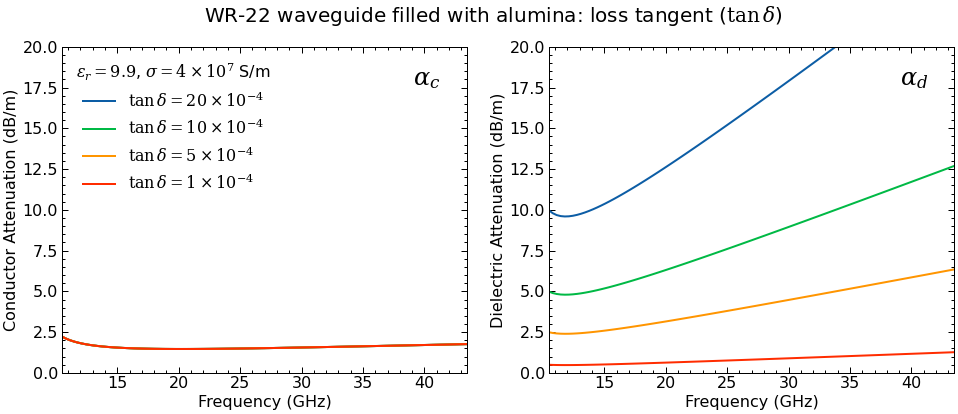

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle(r"WR-22 waveguide filled with alumina: loss tangent ($\tan\,\delta$)", fontsize=20)
ax1.text(0.9, 0.9, r'$\alpha_c$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.9, 0.9, r'$\alpha_d$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
for _tand in np.array([1, 5, 10, 20][::-1]) * 1e-4:
    _er = er_mag2 * (1 - 1j * _tand)
    alphac = conductor_loss(freq2, cond1, a, b, er=_er, ur=1)
    alphad = dielectric_loss(freq2, a, b, er=_er, ur=1)
    ax1.plot(freq2/1e9, np2db(alphac), label=r"$\tan\,\delta={:.0f}\times10^{{-4}}$".format(_tand*1e4))
    ax2.plot(freq2/1e9, np2db(alphad), label=r"$\tan\,\delta={:.0f}\times10^{{-4}}$".format(_tand*1e4))
ax1.autoscale(enable=True, axis='x', tight=True)
ax2.autoscale(enable=True, axis='x', tight=True)
ax1.set_ylabel("Conductor Attenuation (dB/m)")
ax2.set_ylabel("Dielectric Attenuation (dB/m)")
ax1.set_xlabel("Frequency (GHz)")
ax2.set_xlabel("Frequency (GHz)")
ax1.legend(loc=2, title=r"$\varepsilon_r={:.1f}$, $\sigma={:.0f}\times10^7$ S/m".format(er_mag2, cond1/1e7))
ax1.set_ylim([0, 20])
ax2.set_ylim([0, 20])
fig.savefig("results/wr22-alumina-tand-300k.png", dpi=400);

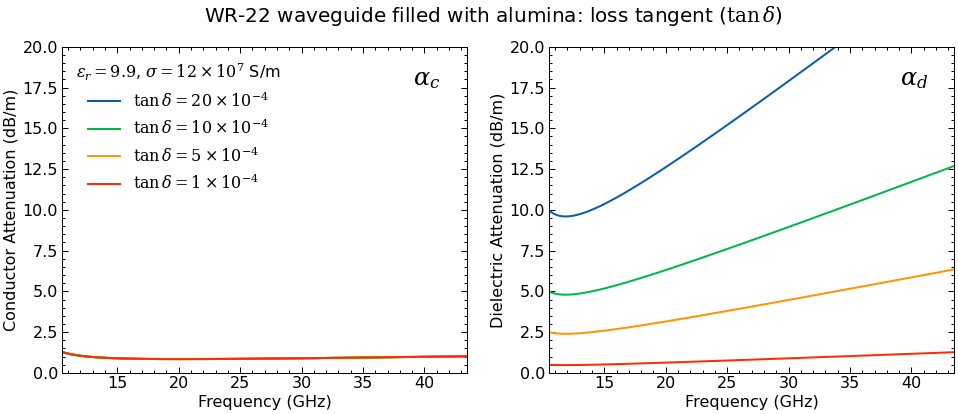

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle(r"WR-22 waveguide filled with alumina: loss tangent ($\tan\,\delta$)", fontsize=20)
ax1.text(0.9, 0.9, r'$\alpha_c$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.9, 0.9, r'$\alpha_d$', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
for _tand in np.array([1, 5, 10, 20][::-1]) * 1e-4:
    _er = er_mag2 * (1 - 1j * _tand)
    alphac = conductor_loss(freq2, cond2, a, b, er=_er, ur=1)
    alphad = dielectric_loss(freq2, a, b, er=_er, ur=1)
    ax1.plot(freq2/1e9, np2db(alphac), label=r"$\tan\,\delta={:.0f}\times10^{{-4}}$".format(_tand*1e4))
    ax2.plot(freq2/1e9, np2db(alphad), label=r"$\tan\,\delta={:.0f}\times10^{{-4}}$".format(_tand*1e4))
ax1.autoscale(enable=True, axis='x', tight=True)
ax2.autoscale(enable=True, axis='x', tight=True)
ax1.set_ylabel("Conductor Attenuation (dB/m)")
ax2.set_ylabel("Dielectric Attenuation (dB/m)")
ax1.set_xlabel("Frequency (GHz)")
ax2.set_xlabel("Frequency (GHz)")
ax1.legend(loc=2, title=r"$\varepsilon_r={:.1f}$, $\sigma={:.0f}\times10^7$ S/m".format(er_mag2, cond2/1e7))
ax1.set_ylim([0, 20])
ax2.set_ylim([0, 20])
fig.savefig("results/wr22-alumina-tand-4k.png", dpi=400);